In [1]:
import ROOT
import numpy as np
from ROOT import TGraphErrors
from ROOT import TVectorT
import matplotlib.pyplot as plt
from matplotlib import ticker
from root_np_functions import *
from plotting_functions import *

Welcome to JupyROOT 6.18/00


In [2]:
filename_14T = "DeltaR_Histograms_Jet_Callibration_1.400000T.root"
filename = "DeltaR_Histograms_Jet_Callibration_3.000000T.root"


file = ROOT.TFile(filename)
file_14T = ROOT.TFile(filename_14T)

In [3]:
h1 = file.Get("dPhi_e_RecoJet")
h1M = file.Get("sigmamin_dPhi_e_RecoJet")
h1P = file.Get("sigmaplus_dPhi_e_RecoJet")

dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(h1)
TJ_dPhi, TJ_dPhi_errors = TH1_to_numpy_wErrors(file.Get("dPhi_e_TrueJet"),True,False)
RJ_dPhi, RJ_dPhi_errors = TH1_to_numpy_wErrors(h1,True,False)

all_TJ_dPhi, all_TJ_dPhi_errors = TH1_to_numpy_wErrors(file.Get("all_dPhi_e_TrueJet"),True,False)

TJ_dPhi = TJ_dPhi/dPhi_widths
TJ_dPhi_errors = TJ_dPhi_errors/dPhi_widths
RJ_dPhi = RJ_dPhi/dPhi_widths
RJ_dPhi_errors = RJ_dPhi_errors/dPhi_widths

all_TJ_dPhi = all_TJ_dPhi/dPhi_widths
all_TJ_dPhi_errors = all_TJ_dPhi_errors/dPhi_widths

dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(h1)
RJ_dPhi_M, RJ_dPhi_errors_M = TH1_to_numpy_wErrors(h1M,True,False)
RJ_dPhi_P, RJ_dPhi_errors_P = TH1_to_numpy_wErrors(h1P,True,False)

#print(RJ_dPhi_M)

h1_14T = file_14T.Get("dPhi_e_RecoJet")
h1M_14T = file_14T.Get("sigmamin_dPhi_e_RecoJet")
h1P_14T = file_14T.Get("sigmaplus_dPhi_e_RecoJet")
Tesla14_RecodPhi,Tesla14_RecodPhi_errors = TH1_to_numpy_wErrors(h1_14T,True,False)
Tesla14_TruthdPhi,Tesla14_TruthdPhi_errors = TH1_to_numpy_wErrors(file_14T.Get("dPhi_e_TrueJet"),True,False)
Tesla14_RecodPhi_M,Tesla14_RecodPhi_errors_M = TH1_to_numpy_wErrors(h1M_14T,True,False)
Tesla14_RecodPhi_P,Tesla14_RecodPhi_errors_P = TH1_to_numpy_wErrors(h1P_14T,True,False)
#print(Tesla14_RecodPhi_P)

RJ_dPhi_M = RJ_dPhi_M/dPhi_widths
RJ_dPhi_errors_M = RJ_dPhi_errors_M/dPhi_widths
RJ_dPhi_P = RJ_dPhi_P/dPhi_widths
RJ_dPhi_errors_P = RJ_dPhi_errors_P/dPhi_widths

Tesla14_RecodPhi = Tesla14_RecodPhi/dPhi_widths
Tesla14_RecodPhi_errors = Tesla14_RecodPhi_errors/dPhi_widths
Tesla14_RecodPhi_M = Tesla14_RecodPhi_M/dPhi_widths
Tesla14_RecodPhi_errors_M = Tesla14_RecodPhi_errors_M/dPhi_widths
Tesla14_RecodPhi_P = Tesla14_RecodPhi_P/dPhi_widths
Tesla14_RecodPhi_errors_P = Tesla14_RecodPhi_errors_P/dPhi_widths


print(RJ_dPhi_P)
print(RJ_dPhi)

file.Close()
file_14T.Close()

[8.05589983 7.49040149 6.92490314 6.18125647 5.15812941 4.46514878
 3.75255549 3.291658   2.9010392  2.46138875 2.11326405 1.79292394
 1.67851676 1.41701464 1.2405007  1.00024563 0.9904393  0.94957959
 0.87603212 0.75999055 0.67173358 0.58020784 0.585111   0.52463864
 0.446188   0.50339159 0.45109117 0.39225319 0.42984412 0.39225319
 0.36610297 0.34322154 0.3203401  0.32197449 0.33831837 0.30889938
 0.28438356 0.26313651 0.23535191 0.23371752 0.23535191 0.22717997
 0.24842702 0.23535191 0.23862069 0.20429853 0.18468588 0.16834199
 0.15853566 0.18468588 0.18305149 0.15526689 0.16343883 0.17324516
 0.19122343 0.14382617 0.15199811 0.16180444 0.13728862 0.14382617
 0.17161077 0.12748229 0.11767596 0.14382617 0.14546056 0.11931034
 0.10460085 0.10133207 0.12911667 0.13075106 0.12421351 0.12257912
 0.1258479  0.12094473 0.10460085 0.11931034 0.12257912 0.10133207
 0.09152574 0.09642891 0.10786963 0.12094473 0.08825697 0.1111384
 0.08989136 0.08825697 0.08989136 0.08825697 0.08989136 0.07191

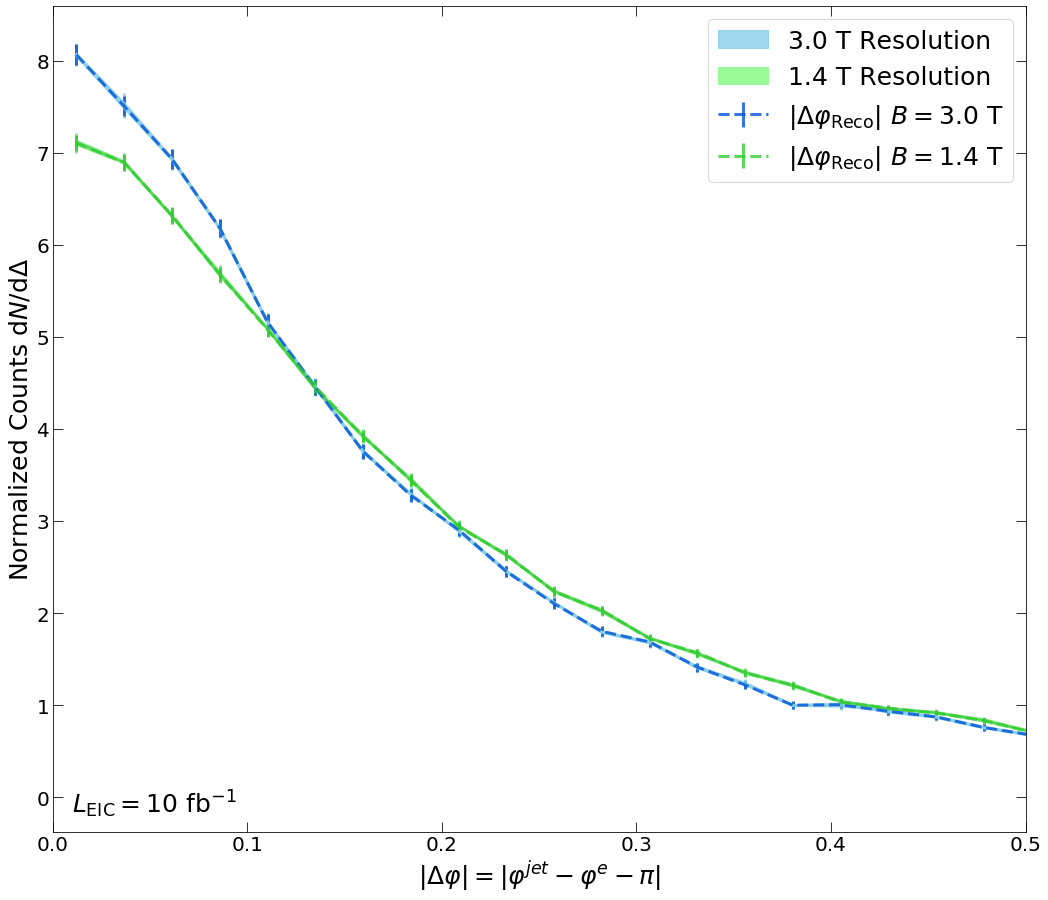

In [4]:
cool = get_colors(plt.cm.winter,4,False)
fig = plt.figure(figsize=(14,12))

#Sigma +/- plots
plt.errorbar(dPhi_centers,RJ_dPhi_M,yerr=RJ_dPhi_errors_M,
                         fmt='-',color="skyblue",linewidth=3,alpha=0.8)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T -" )
plt.errorbar(dPhi_centers,RJ_dPhi_P,yerr=RJ_dPhi_errors_P,
                         fmt='-',color="skyblue",linewidth=3,alpha=0.8)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T +" )
    
plt.errorbar(dPhi_centers,Tesla14_RecodPhi_M,yerr=Tesla14_RecodPhi_errors_M,
                         fmt='-',color="limegreen",linewidth=3,alpha=0.5)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T -" )
plt.errorbar(dPhi_centers,Tesla14_RecodPhi_P,yerr=Tesla14_RecodPhi_errors_P,
                         fmt='-',color="limegreen",linewidth=3,alpha=0.5)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T +" )

#Pretty Bands    
plt.fill_between(dPhi_centers,RJ_dPhi_M,RJ_dPhi_P,color="skyblue",alpha=0.8,label="3.0 T Resolution")

plt.fill_between(dPhi_centers,Tesla14_RecodPhi_M,Tesla14_RecodPhi_P,color="palegreen",alpha=1.0,label="1.4 T Resolution")


#Original Plots
#plt.errorbar(dPhi_centers,TJ_dPhi,yerr=TJ_dPhi_errors,
#                         fmt='-',color="darkgrey",fillstyle='none',markersize=7,linewidth=3,
 #                        label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 3.0$ T" )
plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color=cool[1],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T" )

#plt.errorbar(dPhi_centers,Tesla14_TruthdPhi,yerr=Tesla14_TruthdPhi_errors,
#                         fmt='-',color=cool[2],fillstyle='none',markersize=7,linewidth=3,
#                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 1.4$ T" )
                         #label=r"$|\varphi_{truth}^{jet} - \varphi^{e}-\pi|$")
plt.errorbar(dPhi_centers,Tesla14_RecodPhi,yerr=Tesla14_RecodPhi_errors,
                         fmt='--',color="limegreen",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")




plt.text(.01,0.1,r'$L_\mathrm{EIC} = 10\ \mathrm{fb}^{-1}$',ha="left",va="top",size=25,alpha=1.)

plt.tight_layout()
plt.xlim(0,.5)
plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig("azimuthal_correlations.pdf")

In [5]:
#Compare Fun4ALl and DeltaR

In [6]:
F_filename_14T = "Histograms_Jet_Callibration_1.400000T.root"
F_filename = "Histograms_Jet_Callibration_3.000000T.root"

F_file = ROOT.TFile(F_filename)
F_file_14T = ROOT.TFile(F_filename_14T)

F_TJ_dPhi, F_TJ_dPhi_errors = TH1_to_numpy_wErrors(F_file.Get("dPhi_e_TrueJet"),True,False)
F_RJ_dPhi, F_RJ_dPhi_errors = TH1_to_numpy_wErrors(F_file.Get("dPhi_e_RecoJet"),True,False)

F_TJ_dPhi = F_TJ_dPhi/dPhi_widths
F_TJ_dPhi_errors = F_TJ_dPhi_errors/dPhi_widths
F_RJ_dPhi = F_RJ_dPhi/dPhi_widths
F_RJ_dPhi_errors = F_RJ_dPhi_errors/dPhi_widths

F_Tesla14_RecodPhi,F_Tesla14_RecodPhi_errors = TH1_to_numpy_wErrors(F_file_14T.Get("dPhi_e_RecoJet"),True,False)
F_Tesla14_TruthdPhi,F_Tesla14_TruthdPhi_errors = TH1_to_numpy_wErrors(F_file_14T.Get("dPhi_e_TrueJet"),True,False)

F_Tesla14_RecodPhi = F_Tesla14_RecodPhi/dPhi_widths
F_Tesla14_RecodPhi_errors = F_Tesla14_RecodPhi_errors/dPhi_widths

print(F_RJ_dPhi)
print(RJ_dPhi)

[7.40272506 7.01688132 6.50589907 5.8645642  4.94036415 4.35117032
 3.70462135 3.28227887 2.96682554 2.51319844 2.16385343 1.88880941
 1.76106384 1.49644803 1.320472   1.11842545 1.06237382 1.00241162
 0.95027057 0.847292   0.72476055 0.62569256 0.61005024 0.55139157
 0.49925052 0.54748099 0.50185757 0.44971653 0.47057294 0.41191427
 0.39627195 0.37150496 0.33630975 0.37541553 0.36498732 0.3141498
 0.30111454 0.26461581 0.24636644 0.24506292 0.25288408 0.21899239
 0.26852639 0.25288408 0.24636644 0.20335008 0.21638534 0.17076193
 0.16815487 0.20074303 0.1942254  0.16163724 0.17206545 0.17858308
 0.17988661 0.16685135 0.16554782 0.16294077 0.15251256 0.16163724
 0.1942254  0.1394773  0.13426319 0.15251256 0.14729846 0.12513851
 0.10819267 0.10428209 0.14338788 0.12904909 0.13165614 0.13426319
 0.14208435 0.12383499 0.10819267 0.11210325 0.13035262 0.11210325
 0.09906799 0.09385388 0.11601383 0.12644204 0.11340678 0.10819267
 0.10819267 0.10167504 0.10037151 0.10037151 0.09124683 0.08081

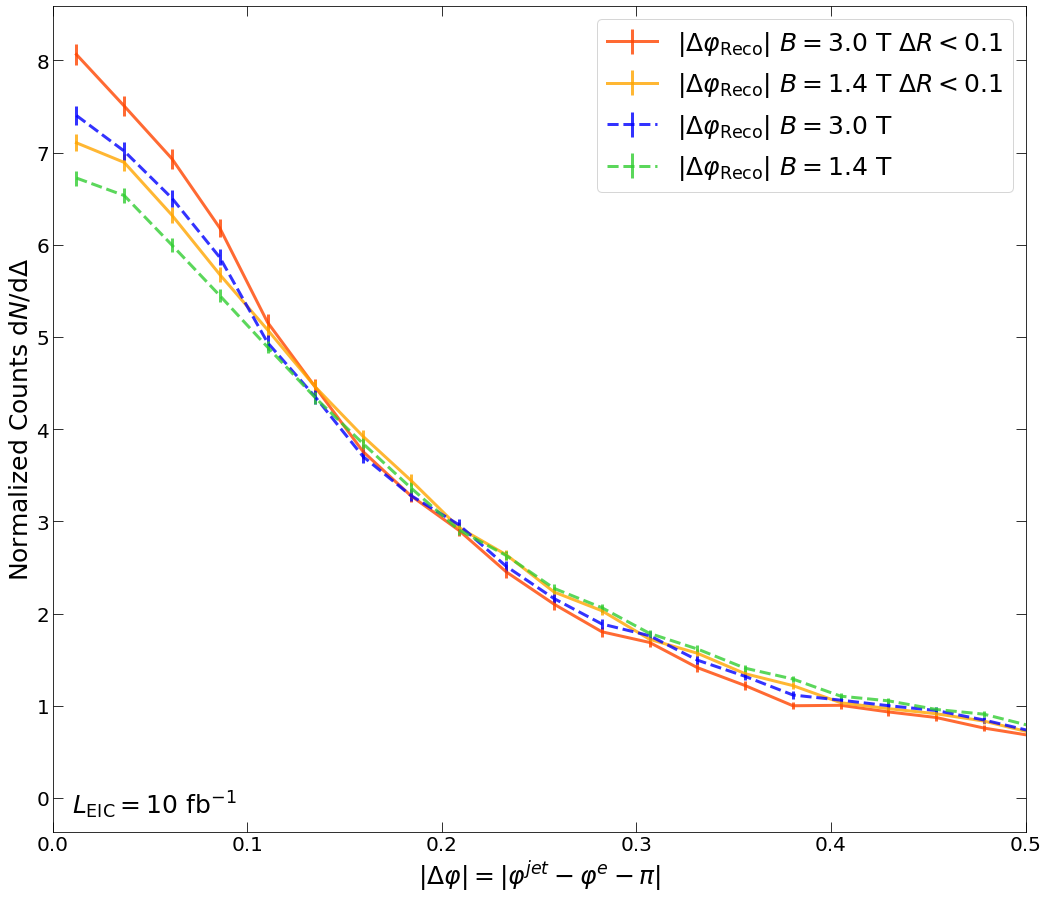

In [7]:
cool = get_colors(plt.cm.winter,4,False)
warm = get_colors(plt.cm.autumn,4,False)

fig = plt.figure(figsize=(14,12))


plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='-',color="orangered",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T $\Delta R < 0.1$" )

plt.errorbar(dPhi_centers,Tesla14_RecodPhi,yerr=Tesla14_RecodPhi_errors,
                         fmt='-',color="orange",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T $\Delta R < 0.1$")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")
    
plt.errorbar(dPhi_centers,F_RJ_dPhi,yerr=F_RJ_dPhi_errors,
                         fmt='--',color="blue",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T" )

plt.errorbar(dPhi_centers,F_Tesla14_RecodPhi,yerr=F_Tesla14_RecodPhi_errors,
                         fmt='--',color="limegreen",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")




plt.text(.01,0.1,r'$L_\mathrm{EIC} = 10\ \mathrm{fb}^{-1}$',ha="left",va="top",size=25,alpha=1.)

plt.tight_layout()
plt.xlim(0,.5)
plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig("DeltaR_Check_azimuthal_correlations.pdf")

In [8]:
# PT Threshold

In [27]:
labels = ["0MeV","100MeV","eta","500MeV","700MeV","1GeV"]
prefixes = np.flip(["min_pT_1.0","min_pT_0.7","min_pT_0.5","min_pT_eta","min_pT_0.3","min_pT_0.1","min_pT_0.0"])
all_dphi_dir = "all_truth_eDelta_Study_3T/"
all_dphi_dir = ""

tab10 = get_colors(plt.cm.autumn,len(prefixes),False)
all_dphi_dict = {}

for s in prefixes:
    allT_filename = all_dphi_dir+s+"_Histograms_Jet_Callibration_3.000000T.root"
    allT_file = ROOT.TFile(allT_filename)
    print(filename)
    all_dphi_dict["%s"%(s)],all_dphi_dict["%s_Errors"%(s)] = TH1_to_numpy_wErrors(allT_file.Get("all_dPhi_e_TrueJet"),True,False)
    all_dphi_dict["%s"%(s)]=all_dphi_dict["%s"%(s)]/dPhi_widths
    all_dphi_dict["%s_Errors"%(s)]=all_dphi_dict["%s_Errors"%(s)]/dPhi_widths
    print(all_dphi_dict["%s"%(s)][0])

DeltaR_Histograms_Jet_Callibration_3.000000T.root
6.390504772861017
DeltaR_Histograms_Jet_Callibration_3.000000T.root
6.508432126177382
DeltaR_Histograms_Jet_Callibration_3.000000T.root
6.948179184940681
DeltaR_Histograms_Jet_Callibration_3.000000T.root
6.508432126177382
DeltaR_Histograms_Jet_Callibration_3.000000T.root
7.431418543410604
DeltaR_Histograms_Jet_Callibration_3.000000T.root
7.854035097894017
DeltaR_Histograms_Jet_Callibration_3.000000T.root
8.373594947665358


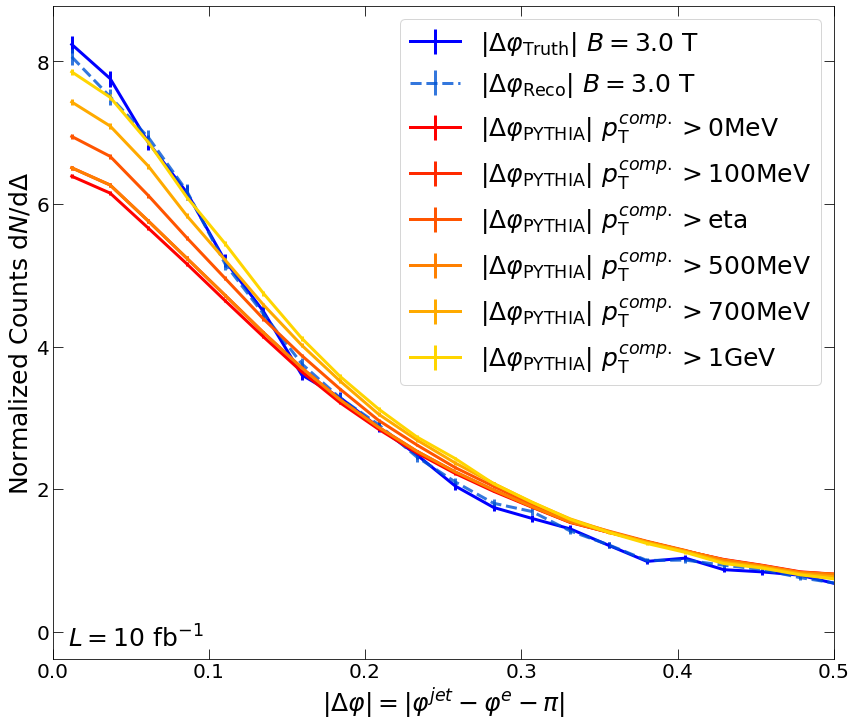

In [28]:
cool = get_colors(plt.cm.winter,4,False)
tab10 = get_colors(plt.cm.autumn,len(prefixes),False)
fig = plt.figure(figsize=(14,12))
plt.tight_layout()
plt.xlim(0,.5)
#3.0T Field
s="700MeV"
plt.errorbar(dPhi_centers,TJ_dPhi,yerr=TJ_dPhi_errors,
                         fmt='-',color=cool[0],fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 3.0$ T" )

plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color=cool[1],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T" )

#1.4T Field
#plt.errorbar(dPhi_centers,Tesla14_TruthdPhi,yerr=Tesla14_TruthdPhi_errors,
#                         fmt='-',color=cool[2],fillstyle='none',markersize=7,linewidth=3,
#                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 1.4$ T" )
                         #label=r"$|\varphi_{truth}^{jet} - \varphi^{e}-\pi|$")

#plt.errorbar(dPhi_centers,Tesla14_RecodPhi,yerr=Tesla14_RecodPhi_errors,
#                         fmt='--',color=cool[3],linewidth=3,alpha=0.8,
#                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")

for s,label,col in zip(prefixes,labels,tab10):
    plt.errorbar(dPhi_centers,all_dphi_dict["%s"%(s)],yerr=all_dphi_dict["%s_Errors"%(s)],
                         fmt='-',color=col,fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{PYTHIA}|\ p_\mathrm{T}^{comp.} >$"+label )

plt.text(.01,0.1,r'$L = 10\ \mathrm{fb}^{-1}$',ha="left",va="top",size=25,alpha=1.)

plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig("azimuthal_correlations.pdf")

8.003859796871593
8.770027779457113
9.484057053285484
10.35937948793631


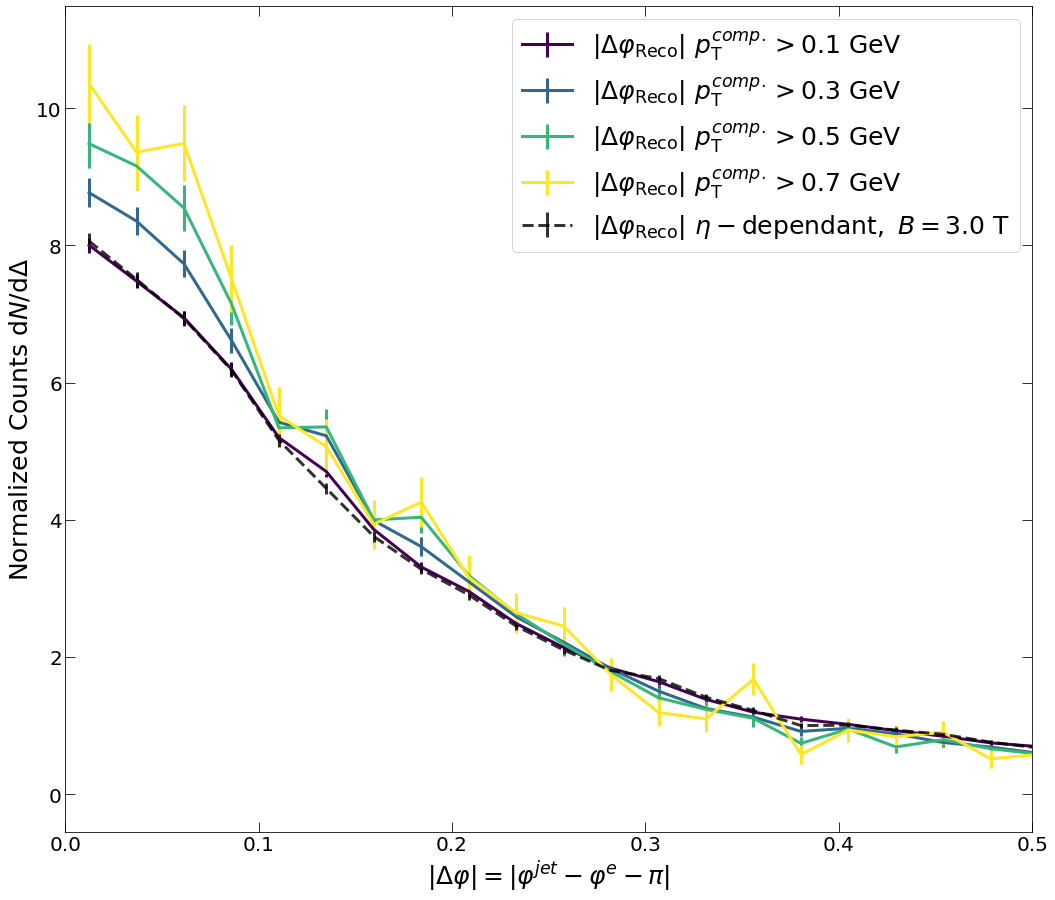

In [32]:
min_pT = [0.1, 0.3, 0.5,0.7]
reco_pT_dphi_dir="min_pT_"
tab10 = get_colors(plt.cm.viridis,len(min_pT),False)

fig = plt.figure(figsize=(14,12))
reco_pt_dphi_dict = {}

for s in min_pT:
    allT_filename = reco_pT_dphi_dir+"%1.1f"%(s)+"_Histograms_Jet_Callibration_3.000000T.root"
    allT_file = ROOT.TFile(allT_filename)
    reco_pt_dphi_dict["%s"%(s)],reco_pt_dphi_dict["%s_Errors"%(s)] = TH1_to_numpy_wErrors(allT_file.Get("dPhi_e_RecoJet"),True,False)
    reco_pt_dphi_dict["%s"%(s)]=reco_pt_dphi_dict["%s"%(s)]/dPhi_widths
    reco_pt_dphi_dict["%s_Errors"%(s)]=reco_pt_dphi_dict["%s_Errors"%(s)]/dPhi_widths
    print(reco_pt_dphi_dict["%s"%(s)][0])
    
for s,col in zip(min_pT,tab10):
    plt.errorbar(dPhi_centers,reco_pt_dphi_dict["%s"%(s)],yerr=reco_pt_dphi_dict["%s_Errors"%(s)],
                         fmt='-',color=col,fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|\ p_\mathrm{T}^{comp.} >$"+"%s"%(s)+" GeV")
    
plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color="k",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~\eta-\mathrm{dependant},\ B = 3.0$ T" )
    
plt.tight_layout()
plt.xlim(0,.5)
plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')

np.save(all_dphi_dir,all_dphi_dict)